<div class="girk">
# Import Libraries </div><i class="fa fa-lightbulb-o "></i>

In [1]:
#-----------------------------------------------General packages-----------------------------------------------------
%matplotlib notebook
import timeit
import time
from datetime import datetime
from packaging import version

import os # operating system package: giving the path, reading the files from different directories etc
from glob import glob
import joblib # for saving the models

# pandas and numpy are among the most popular python packages for working with data.
# numpy is used for image processing to deal with multidimensional dataset
import numpy as np
import pandas as pd
import random

import psutil
from itertools import chain
from scipy.ndimage.measurements import label
##This package contains various functions for multi-dimensional image processing.
# it includes different filters, measurememts functions

from scipy.ndimage import find_objects

#------------------------------------ matplotlib is amain python package for plotting 
import matplotlib .pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

from matplotlib import style
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns

##---------------------------------------packages for image preprocessing (filtering)-------------------------------------

import skimage
from skimage import io # module providing different utilities to read, wrrite images
import tifffile
from skimage import img_as_ubyte

# libraries for filtering:importing needed libraries
from skimage import data, draw, filters
from skimage import util
from skimage import data, img_as_float
from skimage.transform import resize
from skimage.restoration import denoise_nl_means, denoise_bilateral, estimate_sigma, calibrate_denoiser
from skimage.filters.rank import majority
from skimage.morphology import disk

from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage.util import random_noise
from skimage.restoration import calibrate_denoiser
from skimage.restoration.j_invariant import _invariant_denoise

from functools import partial

from tqdm import tqdm # for showing the progress bar during a loop

from medpy.filter.smoothing import anisotropic_diffusion
import sewar # for applying different metrics

## for cropping images
import scipy
from scipy import ndimage
# from scipy import misc
# from scipy.stats import skew, skewtest
# from scipy.special import boxcox1p
##--------------------------------------------- machine learning libraries------------------------------------
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# from sklearn.cluster import KMeans
# from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import calinski_harabasz_score
# from sklearn.metrics import davies_bouldin_score 


# from sklearn.neighbors import KNeighborsClassifier         ##KNN classifier
# from sklearn.neighbors import NearestCentroid
# from sklearn.preprocessing import MinMaxScaler             ## scaler
# from sklearn.preprocessing import StandardScaler  

# from sklearn.metrics import silhouette_samples, silhouette_score # for calculating the silhoutte index

# TORCH 
import torch
import torch.nn as nn
from torchvision.io import read_image

In [2]:
import torch
torch.cuda.is_available()

False

# Learn what a convolutional layer does !!!

## Function to calculate the output size of a conv2d layer !

In [20]:
batch_size=1                  # Description: 
input_channels=1              # Description:
output_channels=16              # Description:
kernel_size=3                 # Description:
stride=2                      # Description:
padding=0                     # Description:

conv = torch.nn.Conv2d(in_channels= input_channels, out_channels= output_channels,
                             kernel_size= kernel_size , stride=stride , padding= padding)
weights=conv.weight



UP_CONV=torch.nn.ConvTranspose2d(in_channels= output_channels, out_channels= input_channels,
                             kernel_size= kernel_size , stride=stride , padding= padding)

## Define a 3X3 tensor_

The size of the conv2d is torch.Size([1, 1, 6, 6]),<class 'torch.Tensor'>:


<IPython.core.display.Javascript object>


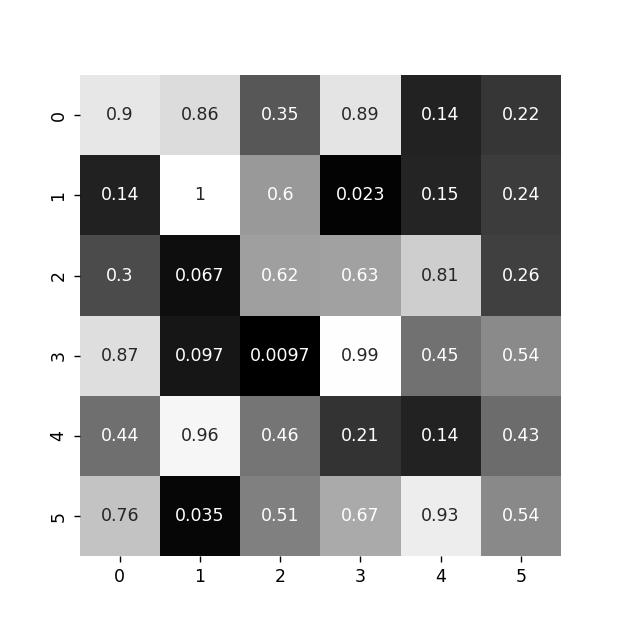

<function matplotlib.pyplot.show(block=None)>

In [21]:

b_n=torch.rand(6,6) # 2d tensor
b=torch.unsqueeze(b_n,0) # torch conv2d receive tensors with shape 
b=torch.unsqueeze(b,0)
print('The size of the conv2d is {},{}:'.format(b.size(),type(b)))

#PLot the tensors 
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
ax.imshow(b_n,cmap='gray')
heatax1=sns.heatmap(b_n,annot=True,cmap='gray',cbar=False,ax=ax)

plt.show

## Calculate a single convolutional layer for 3x3 tensor 

## Results 

<IPython.core.display.Javascript object>


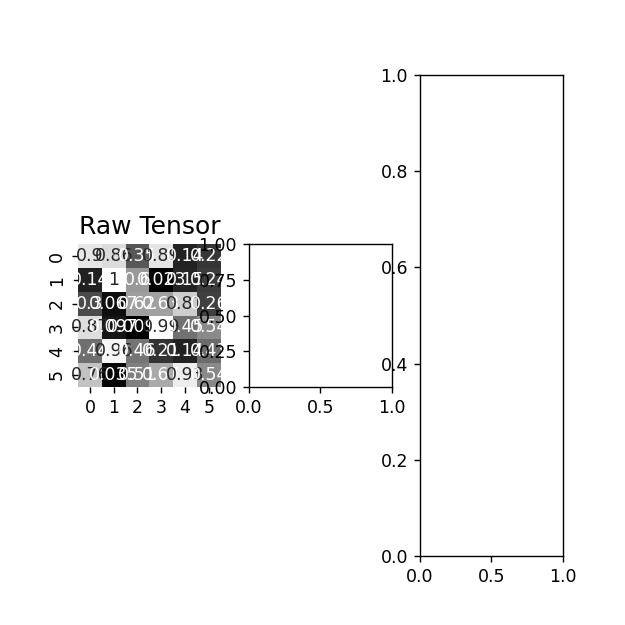

TypeError: Invalid shape (16, 2, 2) for image data

In [22]:
# Required transformations to the tensor in order to be plotted with matplotlib library
var=conv(b)
with torch.no_grad():
    weights=conv.weight

conv_b=var.detach().numpy()
conv_b=conv_b.squeeze()
out=nn.Sigmoid()
final=out(var)
final_t=final.detach().numpy()
final_t=final_t.squeeze()



weight_b=weights.detach().numpy()
weight_b=weight_b.squeeze()
# print('The size of the conv2d is {},{}:'.format(conv(b).size(),type(conv(b))))
# print('This is original tensor b\n',b)

# print('This is Conv2d tensor of b\n',conv_b)
# print('This is the weight tensor',weight_b)
# print('\nThis is the shape of weight_b',weight_b.shape)
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(5,5))
ax[0].imshow(b_n,cmap='gray')
ax[0].set_title('Raw Tensor', fontsize ='x-large')
rect =Rectangle((0, 0),kernel_size,kernel_size,
                linewidth=1.5, edgecolor='r', facecolor='none') # rect showing the size of chosen kernel
# Add the patch to the Axes
ax[0].add_patch(rect)

heatax0=sns.heatmap(b_n,annot=True,cmap='gray',cbar=False,ax=ax[0] )
ax[1].imshow(conv_b,cmap='gray')
ax[1].set_title('Conv2s Tensor', fontsize ='x-large')
heatax1=sns.heatmap(conv_b,annot=True,cmap='gray',cbar=False,ax=ax[1] )

ax[2].imshow(final_t,cmap='gray')
ax[2].set_title('Sigmoid Tensor', fontsize ='x-large')
heatax1=sns.heatmap(final_t,annot=True,cmap='gray',cbar=False,ax=ax[2] )

plt.show


In [7]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

var.register_forward_hook(get_activation('down_conv'))
data, _,_ = KBr_dataset[slice]
data.unsqueeze_(0)
output = model(data)
act_down_conv1 = activation['down_conv'].squeeze()


fig, axarr = plt.subplots(2,figsize =(10,10))
for idx in range(2): 
    
    axarr[idx].imshow(act_down_conv1[idx],cmap='gray')

AttributeError: 'Tensor' object has no attribute 'register_forward_hook'

## Real Image example !

In [ ]:
image=r"C:\Users\vdial\OneDrive\Desktop\Segmentation_Unet\train\train_mask\mask_36.tif"
img= tifffile.imread(image)

print('Shape of img Training image:{}'.format(img.shape))
print('Type of img:{}'.format(type(img)))
print('Min and Max values in img images: {}-{}'.format(img.min(),img.max()))
print('img data type:{}'.format(img.dtype))
print(""" 
""")
image=torch.from_numpy(img)
image=torch.unsqueeze(image,0)
image=torch.unsqueeze(image,0)
print('Shape of img Training image:{}'.format(image.shape))
print('Type of img:{}'.format(type(image)))
print('Min and Max values in img images: {}-{}'.format(image.min(),image.max()))
print('img data type:{}'.format(image.dtype))

In [ ]:
# Required transformations to the tensor in order to be plotted with matplotlib library
image_c=conv(image)
conv_image=image_c.detach().numpy()
conv_image=conv_image.squeeze()

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,8))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Raw Image', fontsize ='x-large')
rect =Rectangle((0, 0),kernel_size,kernel_size,
                 linewidth=1.5, edgecolor='r', facecolor='none') # rect showing the size of chosen kernel 
ax[0].add_patch(rect)

ax[1].imshow(conv_image,cmap='gray')
ax[1].set_title('Convent Tensor', fontsize ='x-large')
plt.show
print('The size of the conv2d is {},{}:'.format(conv(b).size(),type(conv(b))))

# Unet components

<IPython.core.display.Javascript object>


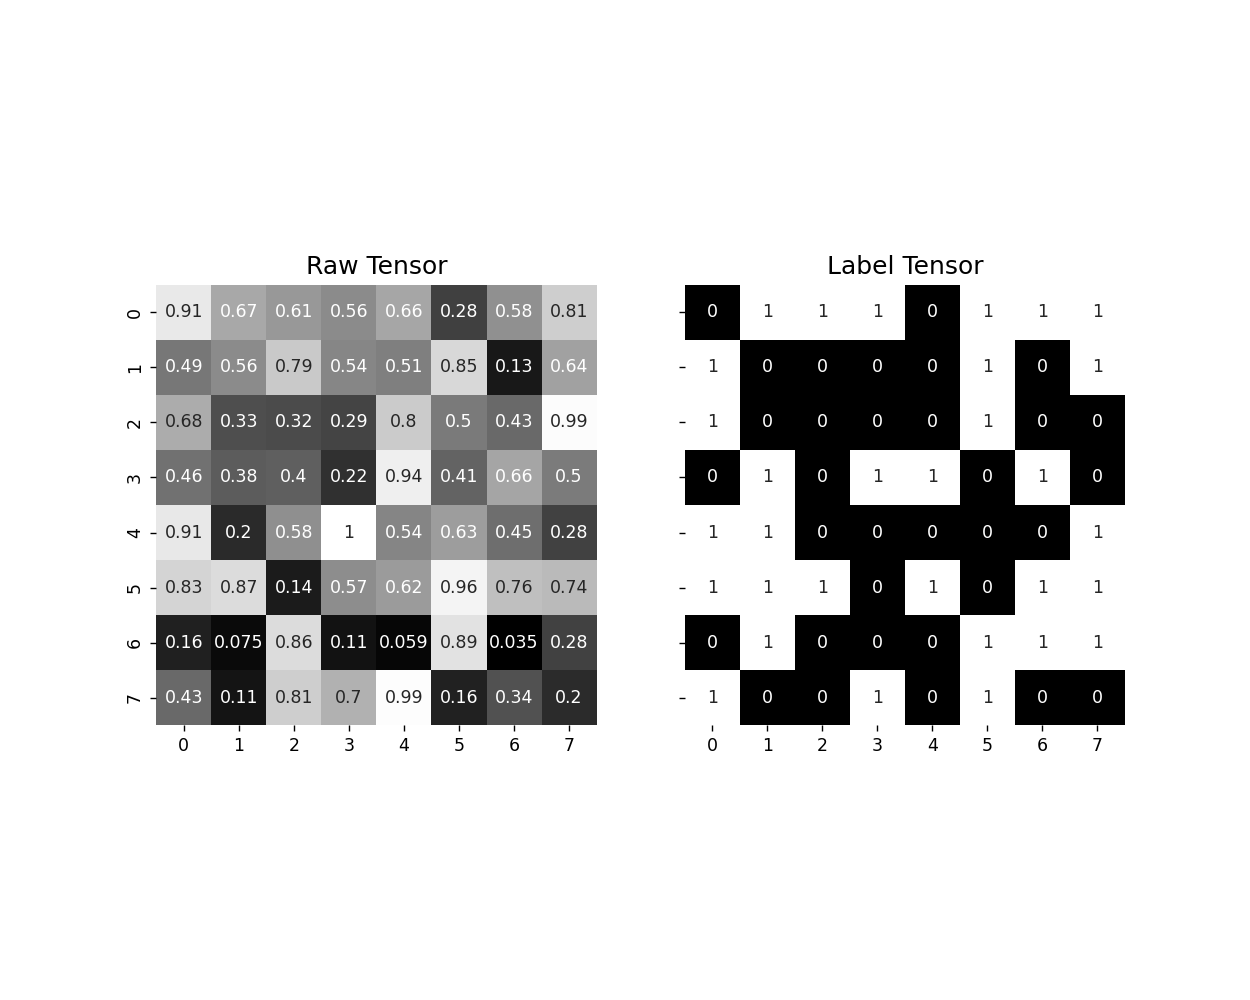

Text(0.5, 1.0, 'Label Tensor')

In [8]:
image_tensor=torch.rand(1,1,8,8)
label=torch.randint(low=0,high=2,size=(1,1,8,8),dtype=int)
label_np=label.detach().cpu().numpy()
label_np=label.squeeze()
img_np=image_tensor.detach().cpu().numpy() # transfrom raw image to numpy
img_np=img_np.squeeze()


#PLot the tensors 
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,8), sharex=True, sharey=True)
ax[0].imshow(img_np,cmap='gray')
ax[0].set_title('Raw Tensor', fontsize ='x-large')
ax[1].imshow(label_np,cmap='gray')
heatax0=sns.heatmap(img_np,annot=True,cmap='gray',cbar=False,ax=ax[0])
heatax1=sns.heatmap(label_np,annot=True,cmap='gray',cbar=False,ax=ax[1])
plt.show

ax[1].set_title('Label Tensor', fontsize ='x-large')


In [11]:
double_conv=nn.Conv2d(1,4)

In [ ]:
# Define the parameters of the Convd2 layer:
# Give a short description for each parameter!
# The  output size  of a 2d concolutional layer depends :
# 1. input_size
# 2. kernel_size
# 3. padding
# 4. stride 


batch_size=1                  # Description: 
input_channels=1              # Description:
output_channels=1             # Description:
kernel_size=3                 # Description:
stride=1                      # Description:
padding=0                    # Description:

conv = torch.nn.Conv2d(in_channels= input_channels, out_channels= output_channels,
                             kernel_size= kernel_size , stride=stride , padding= padding)
transpose=torch.nn.ConvTranspose2d()

In [10]:

x1=down_conv_1(image_tensor)  #
print(x1.shape)
m1=max_pool_2x2(x1)

up_conv=ConvTranspose2d( #1
             in_channels=16,
             out_channels=8,
         kernel_size=2,
         stride=2)

print(m1.shape)

NameError: name 'double_conv' is not defined

In [ ]:
model=model()
LR=1
loss_fn=nn.BCELoss()

# Optimizer function
optimizer=torch.optim.Adam(model.parameters(),lr=LR)
optimizer.zero_grad()


In [ ]:
m=nn.Sigmoid()
optimizer.zero_grad()   # zero the parameter gradients
predicted_label = model(image_tensor)   # predict output from the model PREDICT IMAGE
train_loss = loss_fn(m(predicted_label), label)   # calculate loss for the predicted output  


# backpropagate the loss
train_loss.backward()    

optimizer.step()